## Single layer Neueal Network

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
model = keras.Sequential([
    keras.Input(shape=[1]),
    keras.layers.Dense(units=1)
])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [3]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [4]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - loss: 0.5736
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5617
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5501
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.5387
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5276
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5168
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5061
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4957
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4855
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4755
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4657
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4562
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4468
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4376
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4286
Epoch 16/500
1/1 ━

In [5]:
pred = model.predict(np.array([10.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [6]:
pred

array([[18.987549]], dtype=float32)

In [7]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

## Adding more layers

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8251 - loss: 0.5005
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8634 - loss: 0.3809
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8749 - loss: 0.3410
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8827 - loss: 0.3177
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8891 - loss: 0.2994


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8642 - loss: 0.3698


In [14]:
image = test_images[3523]
image = np.expand_dims(image,-1)
image = np.expand_dims(image, 0) 

In [15]:
pred = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [16]:
pred_label = np.argmax(pred)
pred_label

np.int64(8)

In [17]:
test_labels[3523]

np.uint8(8)

## Load csv data

In [18]:
import numpy as np
import pandas as pd

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [19]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [20]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [21]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435 , 0.335 , 0.11  , ..., 0.1355, 0.0775, 0.0965],
       [0.585 , 0.45  , 0.125 , ..., 0.3545, 0.2075, 0.225 ],
       [0.655 , 0.51  , 0.16  , ..., 0.396 , 0.2825, 0.37  ],
       ...,
       [0.53  , 0.42  , 0.13  , ..., 0.3745, 0.167 , 0.249 ],
       [0.395 , 0.315 , 0.105 , ..., 0.1185, 0.091 , 0.1195],
       [0.45  , 0.355 , 0.12  , ..., 0.1145, 0.0665, 0.16  ]],
      shape=(3320, 7))

In [22]:
abalone_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                     optimizer=tf.keras.optimizers.Adam())

In [23]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 84.1285 
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.7799
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7168 
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6227
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2553
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8401
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4093
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0489
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7934
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6098


### Basic preprocessing

In [24]:
normalize = layers.Normalization()

In [25]:
normalize.adapt(abalone_features)

In [26]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                          optimizer=tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 79.3263
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.1659
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.1287
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5820
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2536
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4161
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6000
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1908
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8898
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6250


### Mixed Data Types

In [27]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [28]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [29]:
input = tf.keras.Input(shape=(), dtype=tf.float32)

result = 2*input + 1
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, ragged=False, name=keras_tensor_15>

In [30]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [31]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [32]:
inputs = {}
for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)
inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=alone>}

### Normalizing numerical inputs

In [33]:
numeric_inputs = {name:input for name, input in inputs.items()
                 if input.dtype==tf.float32}
x = layers.Concatenate()(list(numeric_inputs.values()))

norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor_17>

In [34]:
preprocessed_inputs = [all_numeric_inputs]

In [35]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue
    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

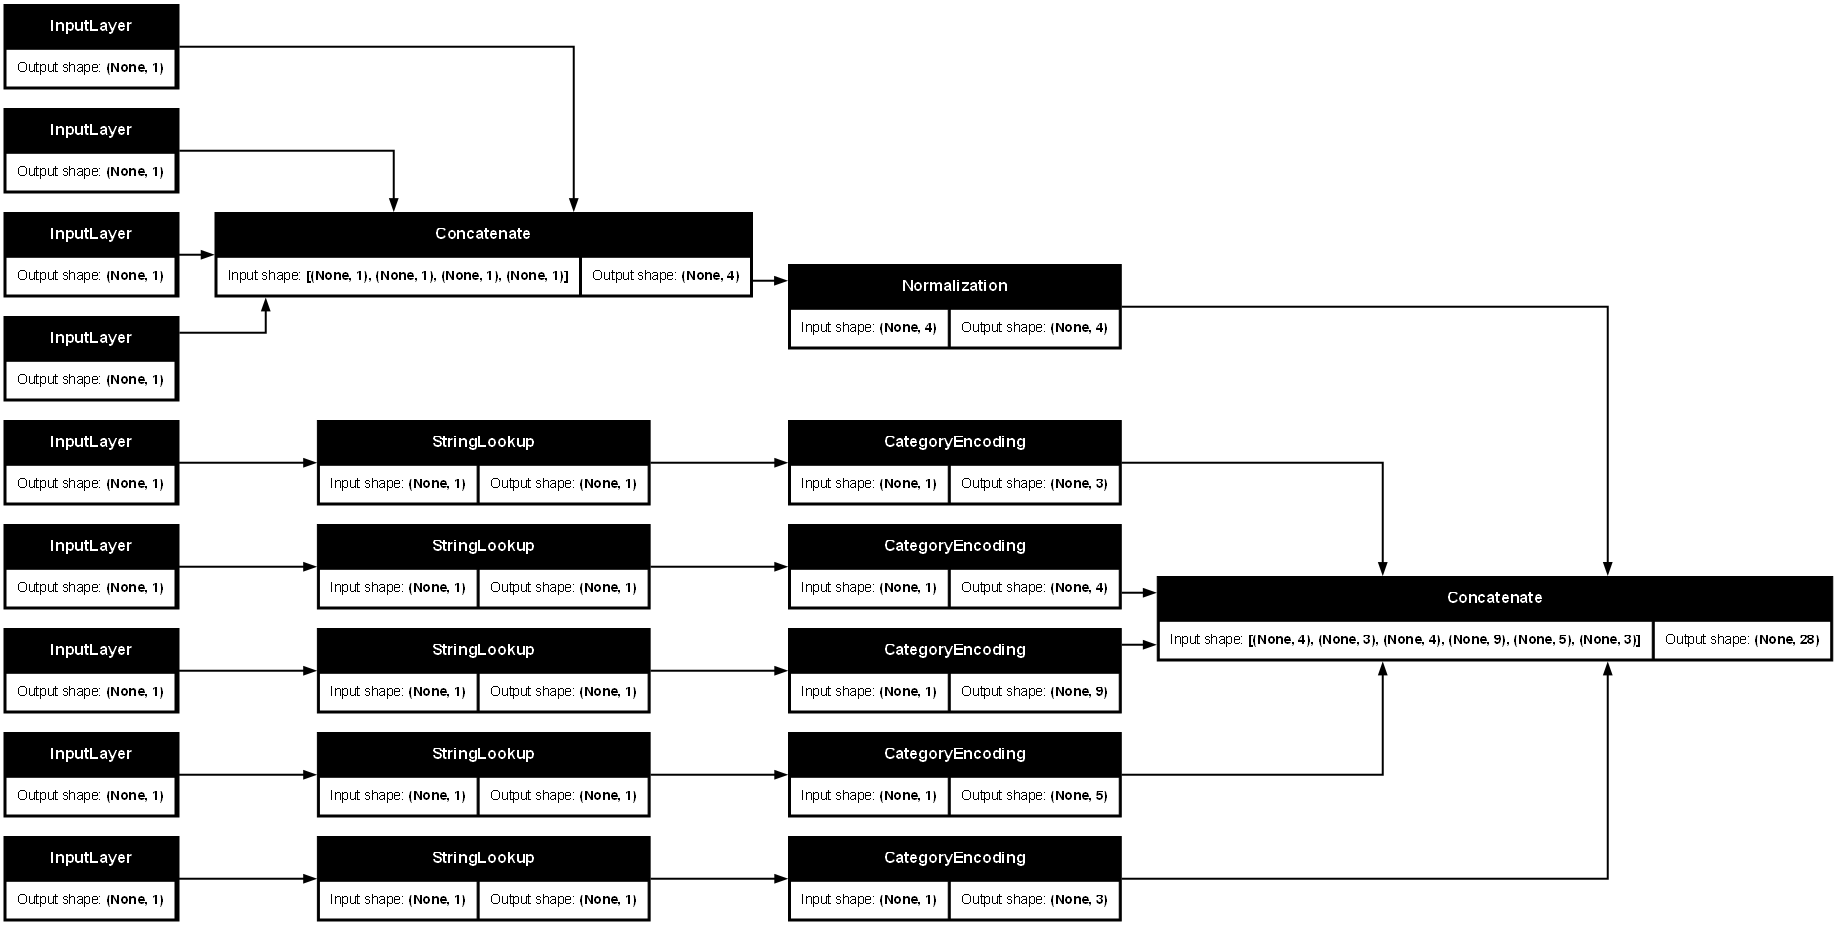

In [36]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing, rankdir='LR', dpi=72, show_shapes=True)

In [38]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

In [39]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.6104149 ,  0.39519805, -0.4790527 , -0.4974028 ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ]], dtype=float32)>

In [42]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam())
    return model
titanic_model = titanic_model(titanic_preprocessing, inputs)

In [43]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6368
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5724 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5276 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4921 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4652 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4459
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4314 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4215 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4145 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4099 


In [44]:
titanic_model.save('test.keras')
reloaded = tf.keras.models.load_model('test.keras')